# Data Exploration

In this section, we load the dataset and inspect its structure, missing values, and key columns.


## Loading the Dataset

In this step, we load the crime dataset into a pandas DataFrame.

Since the full dataset is very large (hundreds of MBs and millions of records),
we load only the first 200,000 rows for faster development and experimentation.

This approach prevents memory overload and allows us to explore the data efficiently.


In [30]:
import pandas as pd

# Load first 200,000 rows (safe for large file)
df = pd.read_csv("../data/raw/chicago_crime.csv", nrows=200000)

print("Dataset Loaded Successfully ✅")

print("\nShape of dataset:")
print(df.shape)

print("\nColumns in dataset:")
print(df.columns)

print("\nFirst 5 rows:")
df.head()


Dataset Loaded Successfully ✅

Shape of dataset:
(200000, 23)

Columns in dataset:
Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='str')

First 5 rows:


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


## Missing Value Analysis and Crime Type Exploration

In this section, we analyze:

1. Missing values in each column
2. The number of unique crime categories
3. The most frequent crime types
4. The data type of the Date column

This helps us understand data quality and prepare for cleaning and feature engineering.


In [31]:
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of unique crime types:")
print(df["Primary Type"].nunique())

print("\nTop 10 crime types:")
print(df["Primary Type"].value_counts().head(10))

print("\nDate column data type:")
print(df["Date"].dtype)



Missing values per column:
Unnamed: 0                 0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     173
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       5
Community Area            40
FBI Code                   0
X Coordinate            7348
Y Coordinate            7348
Year                       0
Updated On                 0
Latitude                7348
Longitude               7348
Location                7348
dtype: int64

Number of unique crime types:
32

Top 10 crime types:
Primary Type
THEFT                  41887
BATTERY                36568
NARCOTICS              22518
CRIMINAL DAMAGE        21067
ASSAULT                12630
OTHER OFFENSE          12074
BURGLARY               11262
DECEPTIVE PRACTICE   

# Week 1 - Day 2: Data Cleaning and Feature Engineering

In this section, we:
1. Remove unnecessary columns
2. Convert the Date column to datetime format
3. Extract time-based features
4. Clean missing geographical coordinates

These steps prepare the dataset for clustering and predictive modeling.


## Removing Unnecessary Columns

The column 'Unnamed: 0' is an index column generated during CSV export and does not contain meaningful information for analysis.


In [32]:
df = df.drop(columns=["Unnamed: 0"])

print("Column removed successfully")
print(df.columns)


Column removed successfully
Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='str')


## Converting Date Column to Datetime

The Date column is currently stored as a string.
We convert it to datetime format to extract useful time-based features.


In [33]:
df["Date"] = pd.to_datetime(df["Date"])

print("Date converted successfully")
print(df["Date"].dtype)


C:\Users\khakh\AppData\Local\Temp\ipykernel_5344\2888653630.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


Date converted successfully
datetime64[us]


## Extracting Time-Based Features

We extract:
- Hour of crime
- Month
- Day
- Weekday name

These features will help in analyzing crime trends.


In [34]:
df["Hour"] = df["Date"].dt.hour
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()

df[["Date", "Hour", "Month", "Weekday"]].head()


,Date,Hour,Month,Weekday
0,2016-05-03 23:40:00,23,5,Tuesday
1,2016-05-03 21:40:00,21,5,Tuesday
2,2016-05-03 23:31:00,23,5,Tuesday
3,2016-05-03 22:10:00,22,5,Tuesday
4,2016-05-03 22:00:00,22,5,Tuesday


## Removing Rows with Missing Coordinates

Latitude and Longitude are essential for hotspot detection.
Rows missing these values are removed.


In [35]:
print("Shape before cleaning:", df.shape)

df = df.dropna(subset=["Latitude", "Longitude"])

print("Shape after cleaning:", df.shape)


Shape before cleaning: (200000, 26)
Shape after cleaning: (192652, 26)


# Week 1 - Day 3: Exploratory Data Analysis (Visualization)

In this section, we analyze crime patterns using visualizations:
- Crime distribution by type
- Crime distribution by hour
- Crime distribution by weekday

This helps identify trends and potential risk patterns.


## Crime Distribution by Type
We visualize the top 10 most common crime categories.


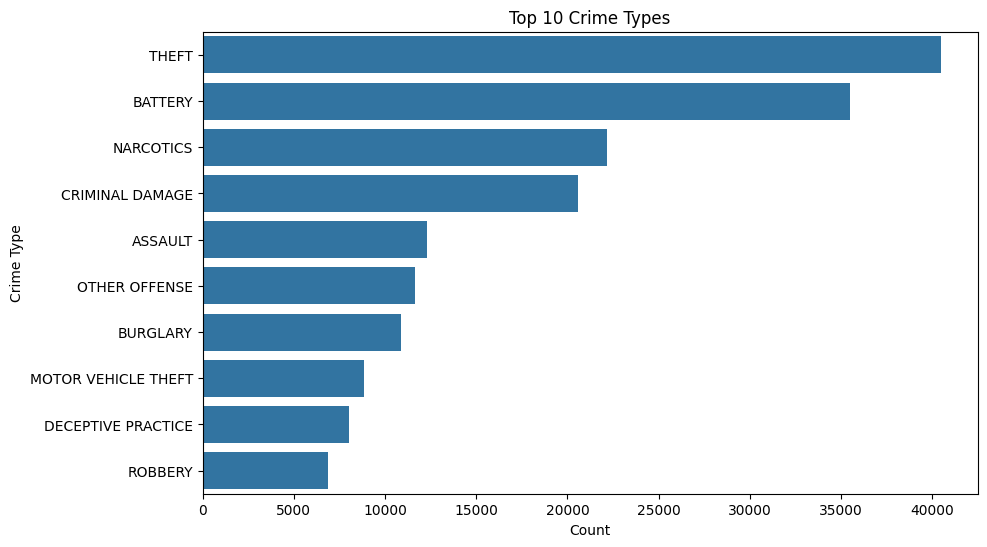

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    y="Primary Type",
    order=df["Primary Type"].value_counts().index[:10]
)

plt.title("Top 10 Crime Types")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()


## Crime Distribution by Hour
We analyze which hours of the day have the highest crime frequency.


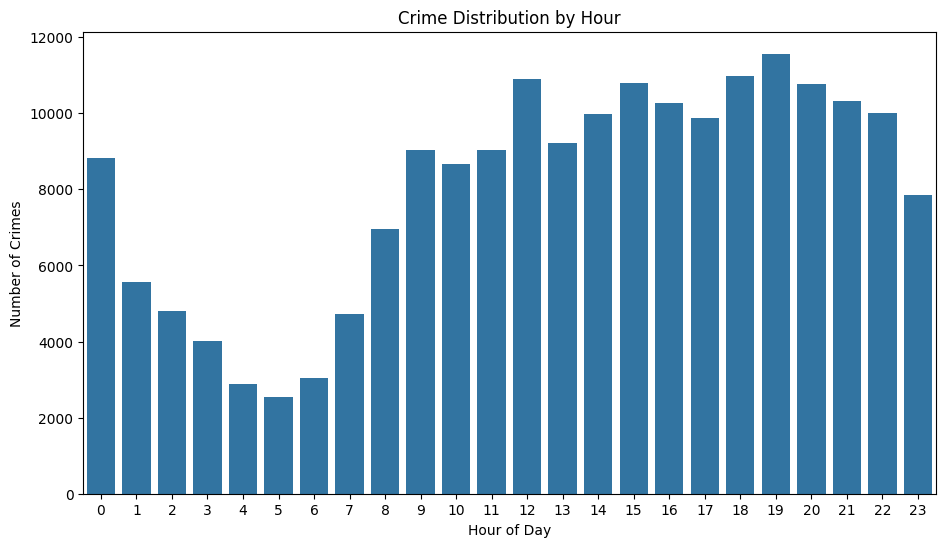

In [42]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x="Hour")

plt.title("Crime Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.show()


## Crime Distribution by Weekday
We analyze crime frequency across days of the week.


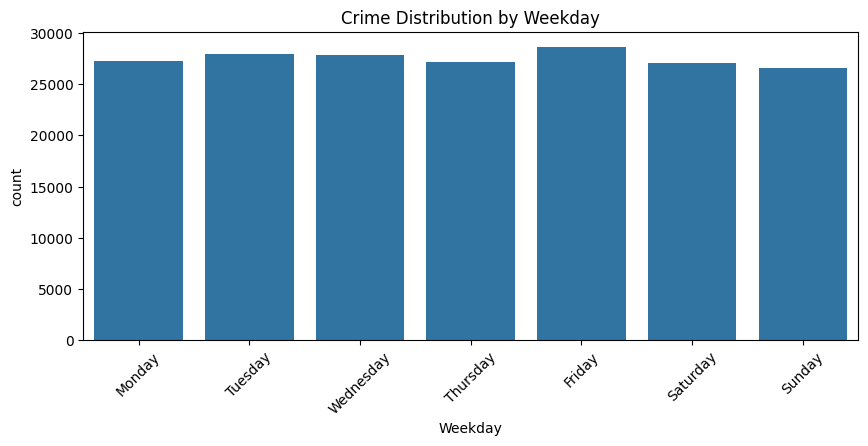

In [43]:
plt.figure(figsize=(10,4))

order = ["Monday", "Tuesday", "Wednesday", "Thursday",
         "Friday", "Saturday", "Sunday"]

sns.countplot(data=df, x="Weekday", order=order)

plt.title("Crime Distribution by Weekday")
plt.xticks(rotation=45)
plt.show()
